In [6]:
#Analise 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
#Separação
from sklearn.model_selection import train_test_split
#Transformação 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Treinamento 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
#Teste e Avalição
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix,classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
df = pd.read_csv('Dados/Modelo2.csv') 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MODELO                1071 non-null   object 
 1   Temperatura do Motor  1071 non-null   float64
 2   Sistema_Eletrico      1071 non-null   float64
 3   Cambio                1071 non-null   float64
 4   Bateria               1071 non-null   float64
 5   Score                 1071 non-null   float64
 6   Status                1071 non-null   object 
dtypes: float64(5), object(2)
memory usage: 58.7+ KB


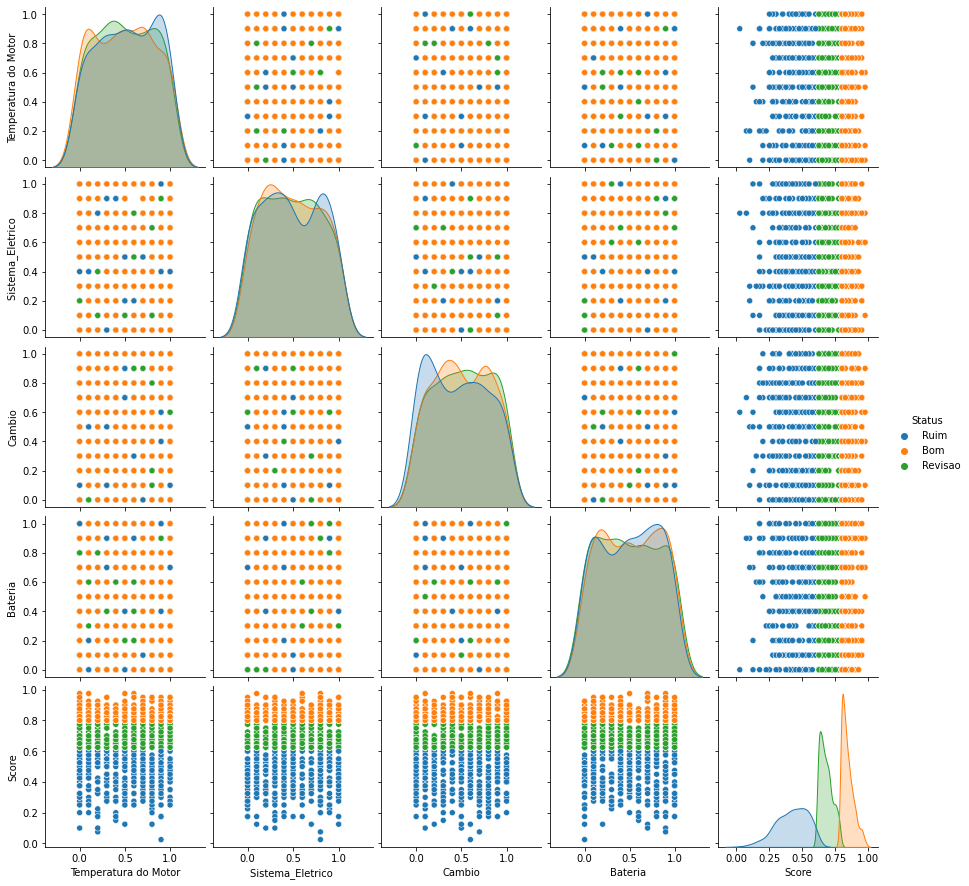

In [22]:
sns.pairplot(df, hue="Status")

In [23]:
df.groupby('Status').mean()

Temperatura do Motor  Sistema_Eletrico     Cambio  Bateria      Score
Status                                                                        
Bom                  0.489636           0.487955  0.506162  0.506723  0.841317
Revisao              0.499720           0.484314  0.517087  0.493838  0.677941
Ruim                 0.521289           0.487955  0.461345  0.498599  0.419608

In [42]:
# Escolhendo as colunas preditivas e alvo
x = df.drop(columns = [ 'MODELO','Status', 'Bateria ']) # Somente Comprimento do Abdômen e Comprimento das Antenas
y = df['Status'] # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify=y)
# O stratify mantem a mesma proporção de exemplos para cada classe

In [43]:
Rf =RandomForestClassifier()
Rf.fit(x_train, y_train)

RandomForestClassifier()

In [44]:
y_predicoes = Rf.predict(x_test)

In [45]:
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

         Bom       1.00      1.00      1.00        71
     Revisao       1.00      1.00      1.00        72
        Ruim       1.00      1.00      1.00        72

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



In [46]:
from joblib import dump, load

In [47]:
dump(Rf, 'meu_modelo_serializado.joblib') 

['meu_modelo_serializado.joblib']

In [48]:
modelo_carregado = load('meu_modelo_serializado.joblib') 

In [50]:
modelo_carregado.predict([[0.8,0.5,0.9, 0.7]])

c:\users\marco\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Revisao'], dtype=object)